# Check/Cleanning/Build the dataset

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
price_and_demand = pd.read_csv("price_and_demand.csv")
price_and_demand

,REGION,SETTLEMENTDATE,TOTALDEMAND,RRP,PERIODTYPE
0,VIC1,1/11/2022 0:30,4178.18,8.94,TRADE
1,VIC1,1/11/2022 1:00,4086.02,0.14,TRADE
2,VIC1,1/11/2022 1:30,4033.37,0.02,TRADE
3,VIC1,1/11/2022 2:00,3985.64,0.00,TRADE
4,VIC1,1/11/2022 2:30,3885.64,0.02,TRADE
...,...,...,...,...,...
8347,VIC1,23/04/2023 22:00,4717.55,84.09,TRADE
8348,VIC1,23/04/2023 22:30,4520.39,81.25,TRADE
8349,VIC1,23/04/2023 23:00,4472.49,93.97,TRADE
8350,VIC1,23/04/2023 23:30,4621.36,83.96,TRADE


In [3]:
# Check datatype of the dataframe
price_and_demand.dtypes

REGION             object
SETTLEMENTDATE     object
TOTALDEMAND       float64
RRP               float64
PERIODTYPE         object
dtype: object

In [4]:
# check if there is any mising data
price_and_demand.isna().sum()

REGION            0
SETTLEMENTDATE    0
TOTALDEMAND       0
RRP               0
PERIODTYPE        0
dtype: int64

In [5]:
# Convert "SETTLEMENTDATE" column to datetime
price_and_demand["SETTLEMENTDATE"] = pd.to_datetime(price_and_demand["SETTLEMENTDATE"], format="%d/%m/%Y %H:%M")
price_and_demand

,REGION,SETTLEMENTDATE,TOTALDEMAND,RRP,PERIODTYPE
0,VIC1,2022-11-01 00:30:00,4178.18,8.94,TRADE
1,VIC1,2022-11-01 01:00:00,4086.02,0.14,TRADE
2,VIC1,2022-11-01 01:30:00,4033.37,0.02,TRADE
3,VIC1,2022-11-01 02:00:00,3985.64,0.00,TRADE
4,VIC1,2022-11-01 02:30:00,3885.64,0.02,TRADE
...,...,...,...,...,...
8347,VIC1,2023-04-23 22:00:00,4717.55,84.09,TRADE
8348,VIC1,2023-04-23 22:30:00,4520.39,81.25,TRADE
8349,VIC1,2023-04-23 23:00:00,4472.49,93.97,TRADE
8350,VIC1,2023-04-23 23:30:00,4621.36,83.96,TRADE


In [6]:
# Extract date from "SETTLEMENTDATE" and create a new 'Date' column
price_and_demand['Date'] = price_and_demand['SETTLEMENTDATE'].dt.date
price_and_demand

,REGION,SETTLEMENTDATE,TOTALDEMAND,RRP,PERIODTYPE,Date
0,VIC1,2022-11-01 00:30:00,4178.18,8.94,TRADE,2022-11-01
1,VIC1,2022-11-01 01:00:00,4086.02,0.14,TRADE,2022-11-01
2,VIC1,2022-11-01 01:30:00,4033.37,0.02,TRADE,2022-11-01
3,VIC1,2022-11-01 02:00:00,3985.64,0.00,TRADE,2022-11-01
4,VIC1,2022-11-01 02:30:00,3885.64,0.02,TRADE,2022-11-01
...,...,...,...,...,...,...
8347,VIC1,2023-04-23 22:00:00,4717.55,84.09,TRADE,2023-04-23
8348,VIC1,2023-04-23 22:30:00,4520.39,81.25,TRADE,2023-04-23
8349,VIC1,2023-04-23 23:00:00,4472.49,93.97,TRADE,2023-04-23
8350,VIC1,2023-04-23 23:30:00,4621.36,83.96,TRADE,2023-04-23


In [7]:
# Calculate maximum daily energy demand and average rrp
max_demand = price_and_demand.groupby("Date")['TOTALDEMAND'].max()
mean_rrp = price_and_demand.groupby("Date")['RRP'].mean().round(2)
max_demand

Date
2022-11-01    5627.52
2022-11-02    6018.43
2022-11-03    6004.84
2022-11-04    5757.62
2022-11-05    4783.60
               ...   
2023-04-20    6084.21
2023-04-21    5903.60
2023-04-22    5313.61
2023-04-23    5361.47
2023-04-24    4395.96
Name: TOTALDEMAND, Length: 175, dtype: float64

In [8]:
mean_rrp

Date
2022-11-01     -3.76
2022-11-02     -2.52
2022-11-03     63.21
2022-11-04    110.94
2022-11-05     72.96
               ...  
2023-04-20    130.71
2023-04-21    131.46
2023-04-22     80.39
2023-04-23     63.21
2023-04-24     63.77
Name: RRP, Length: 175, dtype: float64

In [9]:
weather = pd.read_csv("weather.csv", encoding='latin-1')
weather

,Location,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,...,9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,"Melbourne (Olympic Park), Victoria",1/11/2022,8.5,13.3,3.0,NaN,NaN,SW,44.0,11:36,...,NaN,NW,13,991.3,13.2,59.0,NaN,WNW,11.0,991.5
1,"Melbourne (Olympic Park), Victoria",2/11/2022,6.9,15.7,2.8,NaN,NaN,SSW,43.0,11:33,...,NaN,W,9,1006.7,15.1,54.0,NaN,SSW,13.0,1008.4
2,"Melbourne (Olympic Park), Victoria",3/11/2022,9.1,15.4,0.4,NaN,NaN,SSW,31.0,8:07,...,NaN,SSW,9,1019.2,13.8,67.0,NaN,SSW,9.0,1021.3
3,"Melbourne (Olympic Park), Victoria",4/11/2022,10.2,17.8,0.2,NaN,NaN,S,24.0,14:50,...,NaN,WSW,6,1028.1,16.9,56.0,NaN,SW,9.0,1026.6
4,"Melbourne (Olympic Park), Victoria",5/11/2022,11.8,22.7,0.0,NaN,NaN,N,31.0,11:58,...,NaN,N,9,1026.3,18.8,65.0,NaN,SW,11.0,1023.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,"Melbourne (Olympic Park), Victoria",20/04/2023,7.8,18.5,0.0,NaN,NaN,SSW,17.0,12:47,...,NaN,NNE,7,1026.8,17.5,58.0,NaN,SW,4.0,1025.5
171,"Melbourne (Olympic Park), Victoria",21/04/2023,11.3,19.0,0.0,NaN,NaN,SSW,13.0,10:48,...,NaN,NE,6,1030.5,18.6,64.0,NaN,SSE,2.0,1029.2
172,"Melbourne (Olympic Park), Victoria",22/04/2023,14.6,19.2,0.0,NaN,NaN,SSW,22.0,16:09,...,NaN,SW,6,1031.9,18.8,64.0,NaN,SSW,11.0,1029.7
173,"Melbourne (Olympic Park), Victoria",23/04/2023,14.8,19.0,0.0,NaN,NaN,SSW,26.0,15:45,...,NaN,SSE,7,1034.4,17.8,71.0,NaN,SSW,13.0,1032.4


In [10]:
weather.dtypes

Location                              object
Date                                  object
Minimum temperature (°C)             float64
Maximum temperature (°C)             float64
Rainfall (mm)                        float64
Evaporation (mm)                     float64
Sunshine (hours)                     float64
Direction of maximum wind gust        object
Speed of maximum wind gust (km/h)    float64
Time of maximum wind gust             object
9am Temperature (°C)                 float64
9am relative humidity (%)              int64
9am cloud amount (oktas)             float64
9am wind direction                    object
9am wind speed (km/h)                 object
9am MSL pressure (hPa)               float64
3pm Temperature (°C)                 float64
3pm relative humidity (%)            float64
3pm cloud amount (oktas)             float64
3pm wind direction                    object
3pm wind speed (km/h)                float64
3pm MSL pressure (hPa)               float64
dtype: obj

In [11]:
weather.isna().sum()

Location                               0
Date                                   0
Minimum temperature (°C)               0
Maximum temperature (°C)               1
Rainfall (mm)                          0
Evaporation (mm)                     175
Sunshine (hours)                     175
Direction of maximum wind gust         1
Speed of maximum wind gust (km/h)      1
Time of maximum wind gust              1
9am Temperature (°C)                   0
9am relative humidity (%)              0
9am cloud amount (oktas)             175
9am wind direction                     0
9am wind speed (km/h)                  0
9am MSL pressure (hPa)                 0
3pm Temperature (°C)                   1
3pm relative humidity (%)              1
3pm cloud amount (oktas)             175
3pm wind direction                     1
3pm wind speed (km/h)                  1
3pm MSL pressure (hPa)                 1
dtype: int64

In [12]:
#Removing entirely empty columns
weather = weather.dropna(axis = 1, how = 'all')
weather

,Location,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),9am relative humidity (%),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,"Melbourne (Olympic Park), Victoria",1/11/2022,8.5,13.3,3.0,SW,44.0,11:36,12.0,64,NW,13,991.3,13.2,59.0,WNW,11.0,991.5
1,"Melbourne (Olympic Park), Victoria",2/11/2022,6.9,15.7,2.8,SSW,43.0,11:33,11.0,65,W,9,1006.7,15.1,54.0,SSW,13.0,1008.4
2,"Melbourne (Olympic Park), Victoria",3/11/2022,9.1,15.4,0.4,SSW,31.0,8:07,11.5,70,SSW,9,1019.2,13.8,67.0,SSW,9.0,1021.3
3,"Melbourne (Olympic Park), Victoria",4/11/2022,10.2,17.8,0.2,S,24.0,14:50,12.3,84,WSW,6,1028.1,16.9,56.0,SW,9.0,1026.6
4,"Melbourne (Olympic Park), Victoria",5/11/2022,11.8,22.7,0.0,N,31.0,11:58,14.0,78,N,9,1026.3,18.8,65.0,SW,11.0,1023.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,"Melbourne (Olympic Park), Victoria",20/04/2023,7.8,18.5,0.0,SSW,17.0,12:47,12.4,72,NNE,7,1026.8,17.5,58.0,SW,4.0,1025.5
171,"Melbourne (Olympic Park), Victoria",21/04/2023,11.3,19.0,0.0,SSW,13.0,10:48,14.8,78,NE,6,1030.5,18.6,64.0,SSE,2.0,1029.2
172,"Melbourne (Olympic Park), Victoria",22/04/2023,14.6,19.2,0.0,SSW,22.0,16:09,15.2,84,SW,6,1031.9,18.8,64.0,SSW,11.0,1029.7
173,"Melbourne (Olympic Park), Victoria",23/04/2023,14.8,19.0,0.0,SSW,26.0,15:45,16.7,79,SSE,7,1034.4,17.8,71.0,SSW,13.0,1032.4


In [13]:
#Setting Date format to match
weather["Date"] = pd.to_datetime(weather['Date'], format="%d/%m/%Y")
weather.head()

#Setting Date as the ID Column
weather = weather.set_index('Date')
weather

C:\Users\pamel\AppData\Local\Temp\ipykernel_16852\3475141767.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather["Date"] = pd.to_datetime(weather['Date'], format="%d/%m/%Y")


,Location,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),9am relative humidity (%),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
Date,,,,,,,,,,,,,,,,,
2022-11-01,"Melbourne (Olympic Park), Victoria",8.5,13.3,3.0,SW,44.0,11:36,12.0,64,NW,13,991.3,13.2,59.0,WNW,11.0,991.5
2022-11-02,"Melbourne (Olympic Park), Victoria",6.9,15.7,2.8,SSW,43.0,11:33,11.0,65,W,9,1006.7,15.1,54.0,SSW,13.0,1008.4
2022-11-03,"Melbourne (Olympic Park), Victoria",9.1,15.4,0.4,SSW,31.0,8:07,11.5,70,SSW,9,1019.2,13.8,67.0,SSW,9.0,1021.3
2022-11-04,"Melbourne (Olympic Park), Victoria",10.2,17.8,0.2,S,24.0,14:50,12.3,84,WSW,6,1028.1,16.9,56.0,SW,9.0,1026.6
2022-11-05,"Melbourne (Olympic Park), Victoria",11.8,22.7,0.0,N,31.0,11:58,14.0,78,N,9,1026.3,18.8,65.0,SW,11.0,1023.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-20,"Melbourne (Olympic Park), Victoria",7.8,18.5,0.0,SSW,17.0,12:47,12.4,72,NNE,7,1026.8,17.5,58.0,SW,4.0,1025.5
2023-04-21,"Melbourne (Olympic Park), Victoria",11.3,19.0,0.0,SSW,13.0,10:48,14.8,78,NE,6,1030.5,18.6,64.0,SSE,2.0,1029.2
2023-04-22,"Melbourne (Olympic Park), Victoria",14.6,19.2,0.0,SSW,22.0,16:09,15.2,84,SW,6,1031.9,18.8,64.0,SSW,11.0,1029.7


In [14]:
weather_nocalm = weather.replace("Calm",0)
weather_nocalm

,Location,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),9am relative humidity (%),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
Date,,,,,,,,,,,,,,,,,
2022-11-01,"Melbourne (Olympic Park), Victoria",8.5,13.3,3.0,SW,44.0,11:36,12.0,64,NW,13,991.3,13.2,59.0,WNW,11.0,991.5
2022-11-02,"Melbourne (Olympic Park), Victoria",6.9,15.7,2.8,SSW,43.0,11:33,11.0,65,W,9,1006.7,15.1,54.0,SSW,13.0,1008.4
2022-11-03,"Melbourne (Olympic Park), Victoria",9.1,15.4,0.4,SSW,31.0,8:07,11.5,70,SSW,9,1019.2,13.8,67.0,SSW,9.0,1021.3
2022-11-04,"Melbourne (Olympic Park), Victoria",10.2,17.8,0.2,S,24.0,14:50,12.3,84,WSW,6,1028.1,16.9,56.0,SW,9.0,1026.6
2022-11-05,"Melbourne (Olympic Park), Victoria",11.8,22.7,0.0,N,31.0,11:58,14.0,78,N,9,1026.3,18.8,65.0,SW,11.0,1023.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-20,"Melbourne (Olympic Park), Victoria",7.8,18.5,0.0,SSW,17.0,12:47,12.4,72,NNE,7,1026.8,17.5,58.0,SW,4.0,1025.5
2023-04-21,"Melbourne (Olympic Park), Victoria",11.3,19.0,0.0,SSW,13.0,10:48,14.8,78,NE,6,1030.5,18.6,64.0,SSE,2.0,1029.2
2023-04-22,"Melbourne (Olympic Park), Victoria",14.6,19.2,0.0,SSW,22.0,16:09,15.2,84,SW,6,1031.9,18.8,64.0,SSW,11.0,1029.7


In [15]:
#Replacing all wind directions with True Bearing quantities
weather_bearings = weather_nocalm.replace(['N','NNE','NE','ENE','E','ESE','SE','SSE','S','SSW','SW','WSW','W','WNW','NW','NNW'],
                                          [0,22.5,45,67.5,90,112.5,135,157.5,180,202.5,225,247.5,270,292.5,315,337.5])
#Renaming Columns with True Bearing Units
weather_bearings.rename(columns = {'Direction of maximum wind gust ':'Direction of maximum wind gust (°T)', '9am wind direction':'9am wind direction (°T)','3pm wind direction':'3pm wind direction (°T)'},inplace = True)

#Data Cleaning Complete
processed_data = weather_bearings

processed_data

,Location,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Direction of maximum wind gust (°T),Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),9am relative humidity (%),9am wind direction (°T),9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm wind direction (°T),3pm wind speed (km/h),3pm MSL pressure (hPa)
Date,,,,,,,,,,,,,,,,,
2022-11-01,"Melbourne (Olympic Park), Victoria",8.5,13.3,3.0,225.0,44.0,11:36,12.0,64,315,13,991.3,13.2,59.0,292.5,11.0,991.5
2022-11-02,"Melbourne (Olympic Park), Victoria",6.9,15.7,2.8,202.5,43.0,11:33,11.0,65,270,9,1006.7,15.1,54.0,202.5,13.0,1008.4
2022-11-03,"Melbourne (Olympic Park), Victoria",9.1,15.4,0.4,202.5,31.0,8:07,11.5,70,202.5,9,1019.2,13.8,67.0,202.5,9.0,1021.3
2022-11-04,"Melbourne (Olympic Park), Victoria",10.2,17.8,0.2,180.0,24.0,14:50,12.3,84,247.5,6,1028.1,16.9,56.0,225.0,9.0,1026.6
2022-11-05,"Melbourne (Olympic Park), Victoria",11.8,22.7,0.0,0.0,31.0,11:58,14.0,78,0,9,1026.3,18.8,65.0,225.0,11.0,1023.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-20,"Melbourne (Olympic Park), Victoria",7.8,18.5,0.0,202.5,17.0,12:47,12.4,72,22.5,7,1026.8,17.5,58.0,225.0,4.0,1025.5
2023-04-21,"Melbourne (Olympic Park), Victoria",11.3,19.0,0.0,202.5,13.0,10:48,14.8,78,45,6,1030.5,18.6,64.0,157.5,2.0,1029.2
2023-04-22,"Melbourne (Olympic Park), Victoria",14.6,19.2,0.0,202.5,22.0,16:09,15.2,84,225,6,1031.9,18.8,64.0,202.5,11.0,1029.7


In [16]:
#Selecting key features based on 'expert' insight and desired focus variables
selected_features = ["Minimum temperature (°C)", "Maximum temperature (°C)", "9am relative humidity (%)","3pm relative humidity (%)","Rainfall (mm)", "Speed of maximum wind gust (km/h)", "9am wind speed (km/h)", "9am MSL pressure (hPa)", "3pm MSL pressure (hPa)"]
# selected_features = ["Maximum temperature (°C)", "3pm relative humidity (%)"]
selected_features

selected_data = processed_data[selected_features]

#Checking for missing values across selected features
missing_value = processed_data[selected_features].isnull()
missing_value

#Removing data points with missing selected features
selected_data = processed_data[selected_features].dropna()
predictor_data = processed_data[selected_features].dropna()
predictor_data

,Minimum temperature (°C),Maximum temperature (°C),9am relative humidity (%),3pm relative humidity (%),Rainfall (mm),Speed of maximum wind gust (km/h),9am wind speed (km/h),9am MSL pressure (hPa),3pm MSL pressure (hPa)
Date,,,,,,,,,
2022-11-01,8.5,13.3,64,59.0,3.0,44.0,13,991.3,991.5
2022-11-02,6.9,15.7,65,54.0,2.8,43.0,9,1006.7,1008.4
2022-11-03,9.1,15.4,70,67.0,0.4,31.0,9,1019.2,1021.3
2022-11-04,10.2,17.8,84,56.0,0.2,24.0,6,1028.1,1026.6
2022-11-05,11.8,22.7,78,65.0,0.0,31.0,9,1026.3,1023.2
...,...,...,...,...,...,...,...,...,...
2023-04-19,14.4,17.5,66,53.0,1.2,28.0,9,1022.0,1022.1
2023-04-20,7.8,18.5,72,58.0,0.0,17.0,7,1026.8,1025.5
2023-04-21,11.3,19.0,78,64.0,0.0,13.0,6,1030.5,1029.2


In [17]:
# Introducing Target Variables
selected_data["Average RRP"] = mean_rrp
selected_data["Maximum Energy Demand"] = max_demand
selected_data

,Minimum temperature (°C),Maximum temperature (°C),9am relative humidity (%),3pm relative humidity (%),Rainfall (mm),Speed of maximum wind gust (km/h),9am wind speed (km/h),9am MSL pressure (hPa),3pm MSL pressure (hPa),Average RRP,Maximum Energy Demand
Date,,,,,,,,,,,
2022-11-01,8.5,13.3,64,59.0,3.0,44.0,13,991.3,991.5,-3.76,5627.52
2022-11-02,6.9,15.7,65,54.0,2.8,43.0,9,1006.7,1008.4,-2.52,6018.43
2022-11-03,9.1,15.4,70,67.0,0.4,31.0,9,1019.2,1021.3,63.21,6004.84
2022-11-04,10.2,17.8,84,56.0,0.2,24.0,6,1028.1,1026.6,110.94,5757.62
2022-11-05,11.8,22.7,78,65.0,0.0,31.0,9,1026.3,1023.2,72.96,4783.60
...,...,...,...,...,...,...,...,...,...,...,...
2023-04-19,14.4,17.5,66,53.0,1.2,28.0,9,1022.0,1022.1,102.33,6042.88
2023-04-20,7.8,18.5,72,58.0,0.0,17.0,7,1026.8,1025.5,130.71,6084.21
2023-04-21,11.3,19.0,78,64.0,0.0,13.0,6,1030.5,1029.2,131.46,5903.60


In [18]:
selected_data.isna().sum()

Minimum temperature (°C)             0
Maximum temperature (°C)             0
9am relative humidity (%)            0
3pm relative humidity (%)            0
Rainfall (mm)                        0
Speed of maximum wind gust (km/h)    0
9am wind speed (km/h)                0
9am MSL pressure (hPa)               0
3pm MSL pressure (hPa)               0
Average RRP                          0
Maximum Energy Demand                0
dtype: int64

# Plot Display

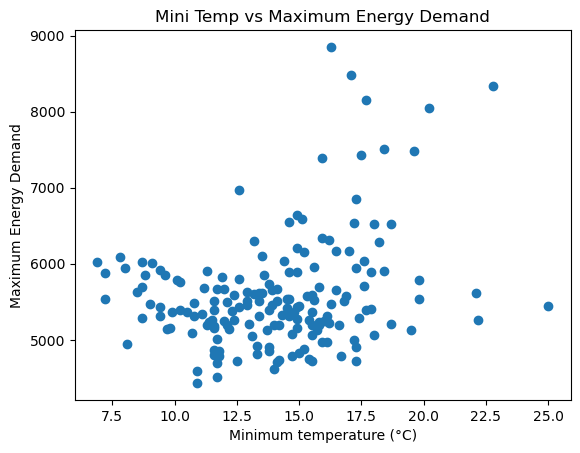

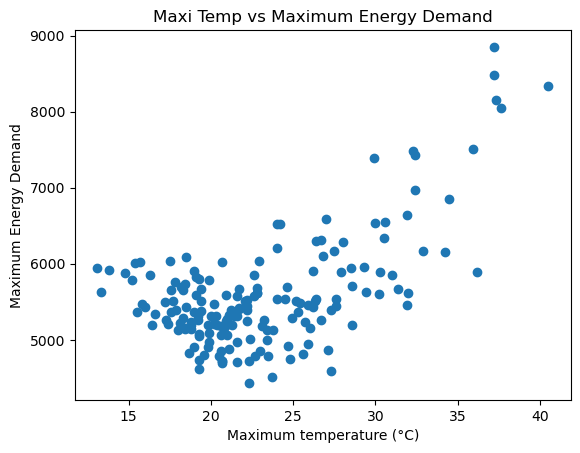

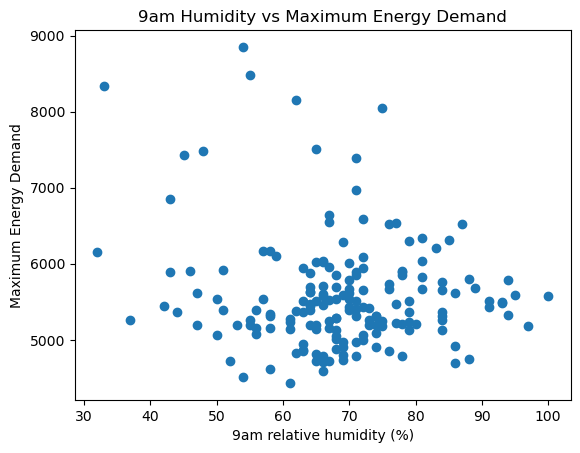

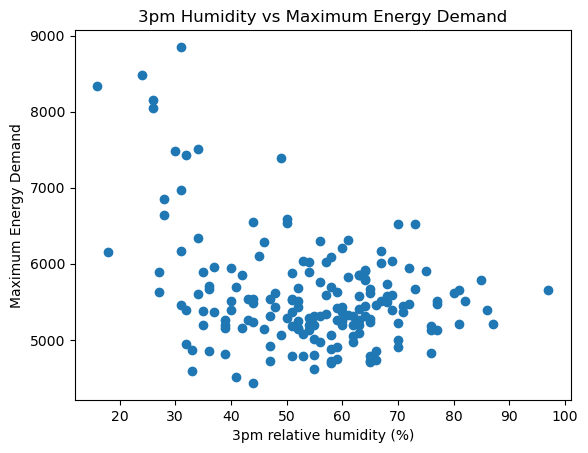

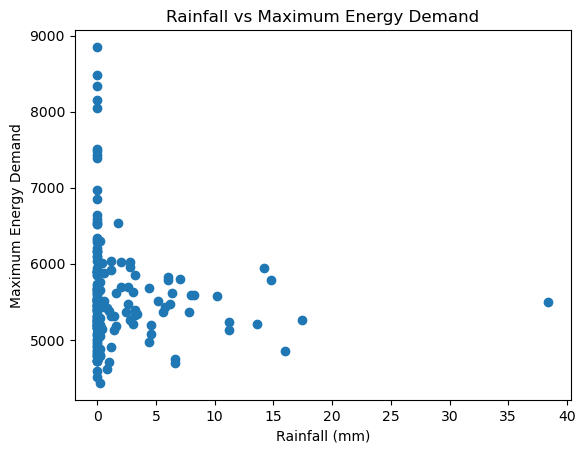

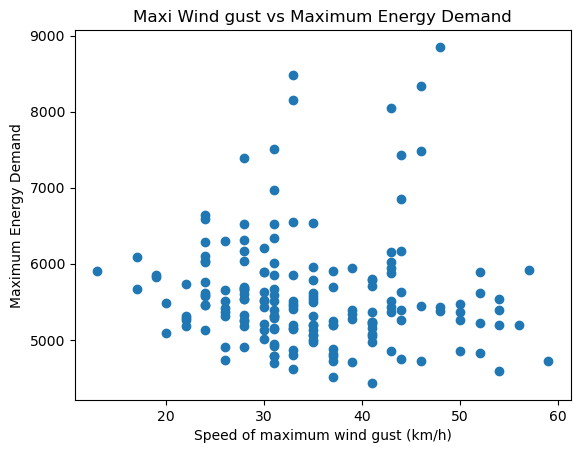

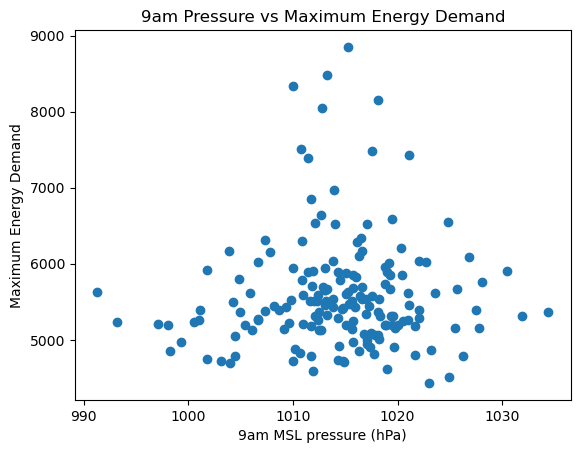

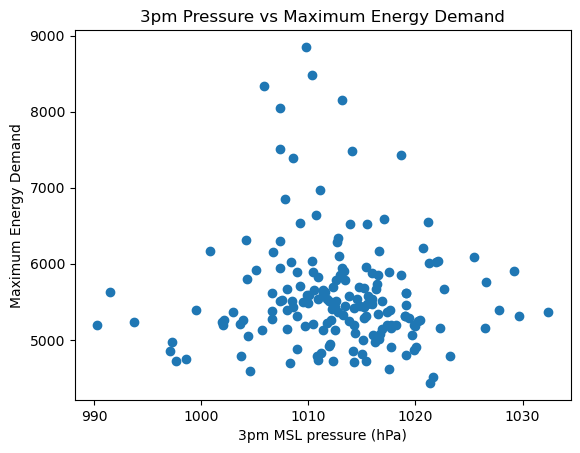

In [19]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(selected_data["Minimum temperature (°C)"], selected_data["Maximum Energy Demand"])
plt.xlabel("Minimum temperature (°C)")
plt.ylabel("Maximum Energy Demand")
plt.title("Mini Temp vs Maximum Energy Demand")
plt.show()

plt.scatter(selected_data["Maximum temperature (°C)"], selected_data["Maximum Energy Demand"])
plt.xlabel("Maximum temperature (°C)")
plt.ylabel("Maximum Energy Demand")
plt.title("Maxi Temp vs Maximum Energy Demand")
plt.show()

plt.scatter(selected_data["9am relative humidity (%)"], selected_data["Maximum Energy Demand"])
plt.xlabel("9am relative humidity (%)")
plt.ylabel("Maximum Energy Demand")
plt.title("9am Humidity vs Maximum Energy Demand")
plt.show()


plt.scatter(selected_data["3pm relative humidity (%)"], selected_data["Maximum Energy Demand"])
plt.xlabel("3pm relative humidity (%)")
plt.ylabel("Maximum Energy Demand")
plt.title("3pm Humidity vs Maximum Energy Demand")
plt.show()


plt.scatter(selected_data["Rainfall (mm)"], selected_data["Maximum Energy Demand"])
plt.xlabel("Rainfall (mm)")
plt.ylabel("Maximum Energy Demand")
plt.title("Rainfall vs Maximum Energy Demand")
plt.show()

plt.scatter(selected_data["Speed of maximum wind gust (km/h)"], selected_data["Maximum Energy Demand"])
plt.xlabel("Speed of maximum wind gust (km/h)")
plt.ylabel("Maximum Energy Demand")
plt.title("Maxi Wind gust vs Maximum Energy Demand")
plt.show()

plt.scatter(selected_data["9am MSL pressure (hPa)"], selected_data["Maximum Energy Demand"])
plt.xlabel("9am MSL pressure (hPa)")
plt.ylabel("Maximum Energy Demand")
plt.title("9am Pressure vs Maximum Energy Demand")
plt.show()

plt.scatter(selected_data["3pm MSL pressure (hPa)"], selected_data["Maximum Energy Demand"])
plt.xlabel("3pm MSL pressure (hPa)")
plt.ylabel("Maximum Energy Demand")
plt.title("3pm Pressure vs Maximum Energy Demand")
plt.show()

Minimum temperature (°C)
Maximum temperature (°C)
9am relative humidity (%)
3pm relative humidity (%)
Rainfall (mm)
Speed of maximum wind gust (km/h)
9am wind speed (km/h)
9am MSL pressure (hPa)
3pm MSL pressure (hPa)
Average RRP
Maximum Energy Demand

In [20]:
"Minimum temperature (°C)", "Maximum temperature (°C)", "9am relative humidity (%)", "3pm relative humidity (%)", "Rainfall (mm)"
"Speed of maximum wind gust (km/h)"
"9am wind speed (km/h)"
"9am MSL pressure (hPa)"
"3pm MSL pressure (hPa)"
"Average RRP"
"Maximum Energy Demand"

'Maximum Energy Demand'

# Prediction

In [21]:
selected_data["Maximum Energy Demand"].describe()

count     174.000000
mean     5592.053506
std       739.659403
min      4433.750000
25%      5188.285000
50%      5446.465000
75%      5848.355000
max      8850.610000
Name: Maximum Energy Demand, dtype: float64

In [22]:
bins = [0, 5000, 6000, float('inf')]  
labels = ['Low Demand', 'Medium Demand', 'High Demand']

selected_data['Demand Category'] = pd.cut(selected_data['Maximum Energy Demand'], bins=bins, labels=labels, right=False)

selected_data[["Minimum temperature (°C)", "Maximum temperature (°C)", "9am relative humidity (%)", "3pm relative humidity (%)", "Rainfall (mm)", "Minimum temperature (°C)", "Maximum temperature (°C)", "9am relative humidity (%)", "3pm relative humidity (%)", "Rainfall (mm)", "9am wind speed (km/h)", "9am MSL pressure (hPa)", "3pm MSL pressure (hPa)", "Average RRP", 'Maximum Energy Demand', 'Demand Category']]

,Minimum temperature (°C),Maximum temperature (°C),9am relative humidity (%),3pm relative humidity (%),Rainfall (mm),Minimum temperature (°C),Maximum temperature (°C),9am relative humidity (%),3pm relative humidity (%),Rainfall (mm),9am wind speed (km/h),9am MSL pressure (hPa),3pm MSL pressure (hPa),Average RRP,Maximum Energy Demand,Demand Category
Date,,,,,,,,,,,,,,,,
2022-11-01,8.5,13.3,64,59.0,3.0,8.5,13.3,64,59.0,3.0,13,991.3,991.5,-3.76,5627.52,Medium Demand
2022-11-02,6.9,15.7,65,54.0,2.8,6.9,15.7,65,54.0,2.8,9,1006.7,1008.4,-2.52,6018.43,High Demand
2022-11-03,9.1,15.4,70,67.0,0.4,9.1,15.4,70,67.0,0.4,9,1019.2,1021.3,63.21,6004.84,High Demand
2022-11-04,10.2,17.8,84,56.0,0.2,10.2,17.8,84,56.0,0.2,6,1028.1,1026.6,110.94,5757.62,Medium Demand
2022-11-05,11.8,22.7,78,65.0,0.0,11.8,22.7,78,65.0,0.0,9,1026.3,1023.2,72.96,4783.60,Low Demand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-19,14.4,17.5,66,53.0,1.2,14.4,17.5,66,53.0,1.2,9,1022.0,1022.1,102.33,6042.88,High Demand
2023-04-20,7.8,18.5,72,58.0,0.0,7.8,18.5,72,58.0,0.0,7,1026.8,1025.5,130.71,6084.21,High Demand
2023-04-21,11.3,19.0,78,64.0,0.0,11.3,19.0,78,64.0,0.0,6,1030.5,1029.2,131.46,5903.60,Medium Demand


# Bin

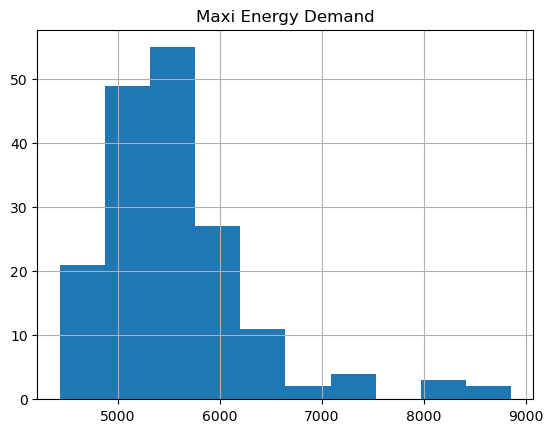

In [23]:
import matplotlib.pyplot as plt
selected_data['Maximum Energy Demand'].hist()
plt.title('Maxi Energy Demand')
plt.show()

# KNN

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

features = selected_data[["Maximum temperature (°C)", "3pm relative humidity (%)"]]
labels = selected_data['Demand Category']

features_train, features_test, labels_train, labels_test = train_test_split(features, 
                                                                            labels, 
                                                                            test_size=0.2, 
                                                                            random_state=1)
scaler = preprocessing.StandardScaler().fit(features_train)
features_train = scaler.transform(features_train)
features_test = scaler.transform(features_test)

knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(features_train, labels_train)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
predictions = knn.predict(features_test)
print(accuracy_score(labels_test, predictions))

0.7428571428571429


# DecisionTreeClassifer

In [25]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

features = selected_data[["Maximum temperature (°C)", "3pm relative humidity (%)"]]
classlabel = selected_data["Demand Category"]

features_train, features_test, classlabel_train, classlabel_test = train_test_split(features, 
                                                                                    classlabel, 
                                                                                    test_size=0.2, 
                                                                                    random_state=1)

dt = DecisionTreeClassifier(criterion='entropy', random_state=1)
dt.fit(features_train, classlabel_train)

predictions = dt.predict(features_train)

# Making predictions on the test set
predictions_test = dt.predict(features_test)

# Evaluating the accuracy on the test set
accuracy_test = accuracy_score(classlabel_test, predictions_test)
print(accuracy_test)

0.7428571428571429


# KFOLD
Tried k = 5, 10, 15, 20, 30, 80, 100. The max (accuracy_scrore)/k is with k=20

In [26]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

features = selected_data[["Maximum temperature (°C)", "3pm relative humidity (%)"]]
Maxi_Energy_Demand = selected_data["Demand Category"]

k = 20
kf = KFold(n_splits=k, shuffle=True, random_state=1)

accuracy_scores=[]

for train_index, test_index in kf.split(selected_data):
    features_train = features.iloc[train_index, :]
    features_test = features.iloc[test_index, :]
    
    class_train = Maxi_Energy_Demand[train_index]
    class_test = Maxi_Energy_Demand[test_index]
    
    scaler = preprocessing.StandardScaler().fit(features_train)
    features_train = scaler.transform(features_train)
    features_test = scaler.transform(features_test)
    
    knn = neighbors.KNeighborsClassifier(n_neighbors=5)
    knn.fit(features_train, class_train)
    
    predictions = knn.predict(features_test)
    
    accuracy_scores.append(accuracy_score(class_test, predictions))

print(accuracy_scores)
print(sum(accuracy_scores)/k)

[0.7777777777777778, 0.5555555555555556, 0.6666666666666666, 0.8888888888888888, 0.6666666666666666, 0.4444444444444444, 0.8888888888888888, 0.7777777777777778, 0.4444444444444444, 0.5555555555555556, 1.0, 0.8888888888888888, 0.5555555555555556, 0.5555555555555556, 0.875, 0.75, 0.75, 0.25, 0.75, 0.5]
0.6770833333333333


# DecisionTreeRegression: R-Square

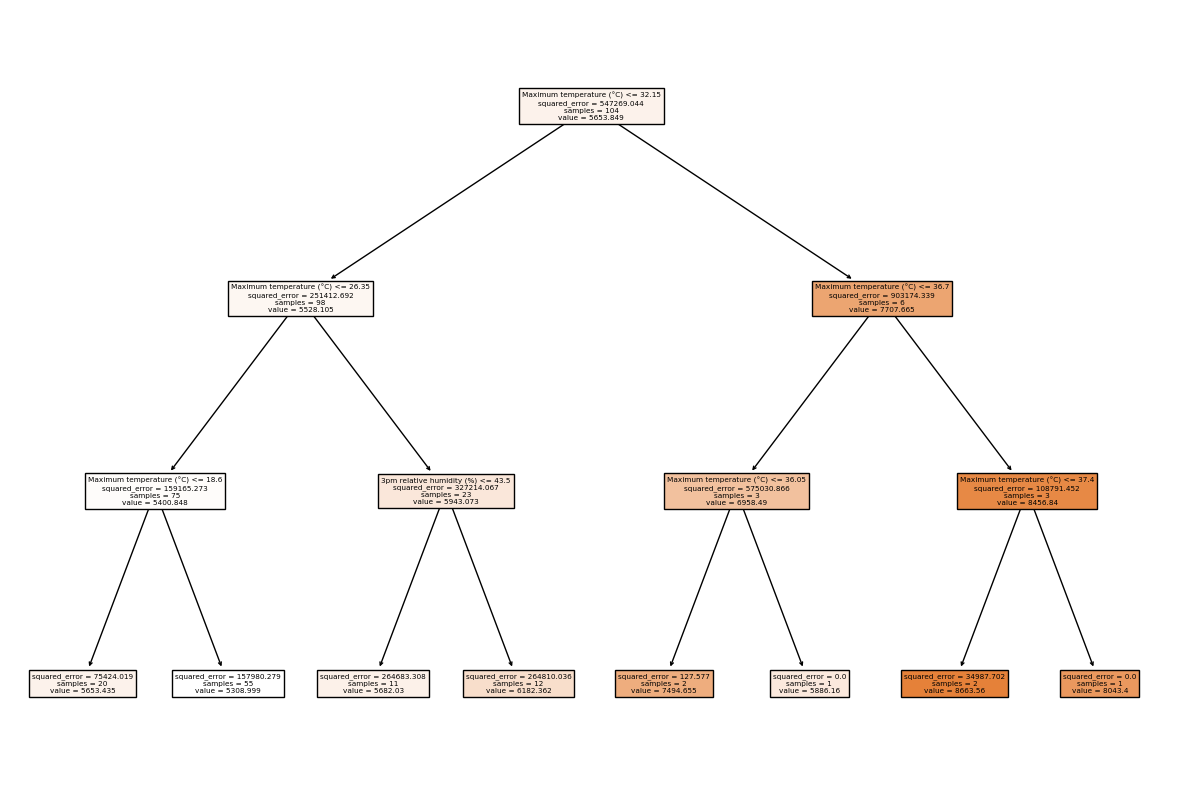

Mean Squared Error: 458.57521857518265
R-squared: 0.5993847816096806


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Define features and labels.
features = selected_data[["Maximum temperature (°C)", "3pm relative humidity (%)"]]
Maxi_Energy_Demand = selected_data["Maximum Energy Demand"]

# Splitting the training set and test set.
features_train, features_test, Maxi_Energy_Demand_train, Maxi_Energy_Demand_test = train_test_split(features, 
                                                                                                    Maxi_Energy_Demand, 
                                                                                                    test_size=0.4, 
                                                                                                    random_state=1)

# Creating a decision tree regression model and fitting it to the training set.
dt_regressor = DecisionTreeRegressor(max_depth = 3, random_state=1)
dt_regressor.fit(features_train, Maxi_Energy_Demand_train)

# Visualizing the decision tree.
plt.figure(figsize=(15, 10))
plot_tree(dt_regressor, filled=True, feature_names=features.columns.tolist())
plt.show()

# Using the model for predictions.
predictions = dt_regressor.predict(features_test)

# Evaluating the regression model.
mse = mean_squared_error(Maxi_Energy_Demand_test, predictions, squared = False)
r2 = r2_score(Maxi_Energy_Demand_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

In [28]:
# When the categories are same, the accuracy result should be same between KNN and DecisionTreeClassifier
# Compare the results between discrete alogthm and regression alogthm, it seems the discrete alogthm is more suitable than regression alogthm in this case.